# PJ01: Analysis of Student Surveys

## Question:

Do students majoring in a B.S. in Computer Science expect a higher grade in Comp 110 than students majoring in a B.A. in Computer Science and is there a greater variance in expected grade distributions between the two?

## Hypothesis: 

Students majoring in a B.S. in Computer Science will have a higher expected grade than students majoring in a B.A. in Computer Science. I believe that there will also be a greater variance in the expected grades of B.A. students compared to B.S. students

## Methodology: 

1. The expected grades of students with a B.S. and B.A. in Computer Science will be separated into individual lists of strings. 

2. The expected grades will be assigned numerical equivalents to allow for statistical analysis. To simplify this step each letter grade will be assigned its UNC GPA equivalent (A = 4, B = 3, C = 2, D = 1, F = 0)

3. The values will then be averaged to identify the average expected grades of students majoring with a B.S. in Computer Science and a B.A. in Computer Science and see which branch of the major expects to receive a higher score.

4. As an addition we will also see the distribution of each letter grade students expected to receive to see if there were any interesting distributions with them or outliers

### This is where I will import and read the csv as well as convert it to a column-oriented data table

In [8]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

### This is where I will import the head and select functions from the data_utils file. I willl then use these functions to iterate through the column header "comp_major" and then use the head function to create a table out of the first 10 values of the column to ensure that I am following the correct method

In [9]:
from data_utils import head, select

analysis: dict[str, list[str]] = select(columns, ["comp_major"])
head(analysis, 10)

{'comp_major': ['No',
  'No',
  'No',
  'No',
  'Yes - BS',
  'Yes - Minor',
  'No',
  'No',
  'No',
  'No']}

### This is where I will create the relationship function to test if the response to major was B.S. in Computer Science or a B.A. in Computer Science

In [10]:
def B_S(col: list[str], comparision: str) -> list[bool]:
    result_BS: list[bool] = []
    for item in col:
        result_BS.append(item == comparision)
    
    return result_BS

B_S_majors: list[bool] = B_S(analysis["comp_major"], "Yes - BS")


def B_A(col: list[str], comparision: str) -> list[bool]:
    result_BA: list[bool] = []
    for item in col:
        result_BA.append(item == comparision)
    
    return result_BA

B_A_majors: list[bool] = B_A(analysis["comp_major"], "Yes - BA")

### This is where I will create a list of the expected grades by students that are getting a BS and BA in Comp Sci separated into different lists

In [11]:
def masked_BS(col: list[float], mask: list[bool]) -> list[str]:
    result_BS_mask: list[float] = []
    for i in range(len(mask)):
        if mask[i]:
            result_BS_mask.append(col[i])
    return result_BS_mask


def masked_BA(col: list[float], mask: list[bool]) -> list[str]:
    result_BA_mask: list[float] = []
    for i in range(len(mask)):
        if mask[i]:
            result_BA_mask.append(col[i])
    return result_BA_mask


masked_list_BS: list[str] = masked_BS(columns["grade"], B_S_majors)
masked_list_BA: list[str] = masked_BA(columns["grade"], B_A_majors)

### This is where I will convert the letter grades into numbers to make it possible to calculate the average expected grades

In [12]:
def numberize_BS(masked: list[str]) -> list[int]:
    values_BS: list[int] = []
    for i in range(len(masked)):
        if masked[i] == "A":
            values_BS.append(4)
        elif masked[i] == "B":
            values_BS.append(3)
        elif masked[i] == "C":
            values_BS.append(2)
        elif masked[i] == "D":
            values_BS.append(1)
        else:
            values_BS.append(0)
    return values_BS


def numberize_BA(masked: list[str]) -> list[int]:
    values_BA: list[int] = []
    for i in range(len(masked)):
        if masked[i] == "A":
            values_BA.append(4)
        elif masked[i] == "B":
            values_BA.append(3)
        elif masked[i] == "C":
            values_BA.append(2)
        elif masked[i] == "D":
            values_BA.append(1)
        else:
            values_BA.append(0)
    return values_BA

B_S_numbers: list[int] = numberize_BS(masked_list_BS)
B_A_numbers: list[int] = numberize_BA(masked_list_BA)

### This is where I will average the numbers in each to find the mean of the entries in each list

In [13]:
Sum_BS: int = 0
Sum_BA: int = 0
for item in B_S_numbers:
    Sum_BS += item
    mean_BS = round(Sum_BS / len(B_S_numbers),2)

for item in B_A_numbers:
    Sum_BA += item
    mean_BA = round(Sum_BA / len(B_A_numbers),2)

print(f"The average expected grade for BS majors is: {mean_BS}")
print(f"The average expected grade for BA majors is: {mean_BA}")

The average expected grade for BS majors is: 3.5
The average expected grade for BA majors is: 3.35


### This is where we will find the distribution of expected letter grades by students from each major to see if there was a significant difference in the variance between the two majors

In [14]:
from data_utils import count

count_BS: dict[str, int] = count(masked_list_BS)
count_BA: dict[str, int] = count(masked_list_BA)
dist_BS: dict[ str, int] = []
dist_BA: dict[str, int] = []

print(count_BS)
print(count_BA)

{'A': 33, 'B': 24, 'C': 3}
{'A': 22, 'B': 19, 'C': 4, 'D': 1}


# Visuals

### This is where I create 2 bar graphs, each representing the amount of each expected letter grade by B.S.'s in Computer Science and B.A.'s in Computer Science

Text(0, 0.5, 'Number of each expected letter grade')

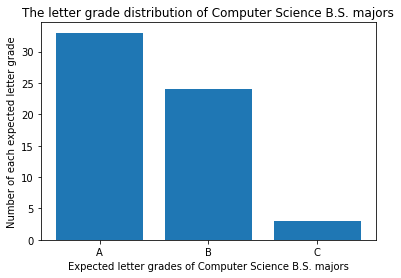

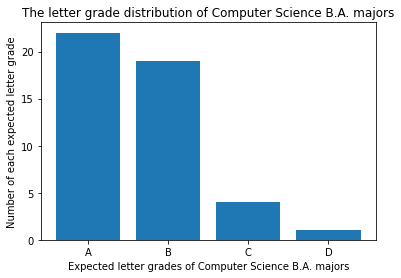

In [15]:
from matplotlib import pyplot as plt

figure, axes = plt.subplots(1)
axes.bar(count_BS.keys(), count_BS.values())
plt.title("The letter grade distribution of Computer Science B.S. majors")
plt.xlabel("Expected letter grades of Computer Science B.S. majors")
plt.ylabel("Number of each expected letter grade")

figure, axes = plt.subplots(1)
axes.bar(count_BA.keys(), count_BA.values())
plt.title("The letter grade distribution of Computer Science B.A. majors")
plt.xlabel("Expected letter grades of Computer Science B.A. majors")
plt.ylabel("Number of each expected letter grade")

### The last visual will depict a linegraph that shows the difference in the average expected GPA of students earning a B.S. in Computer Science and those earning a B.A. in Computer Science. Though they only depict one piece of data each, it is useful to visual the gap between the two.

<function matplotlib.pyplot.show(close=None, block=None)>

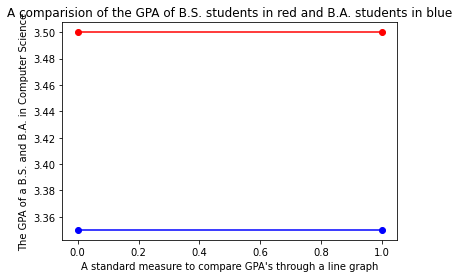

In [16]:
import matplotlib.pyplot as pyplot

x_axis = [0,1]
y_axis_BS = [mean_BS, mean_BS]
y_axis_BA = [mean_BA, mean_BA]

plt.plot(x_axis, y_axis_BS, color = 'red', marker = 'o')
plt.plot(x_axis, y_axis_BA, color = 'blue', marker = 'o')
plt.title("A comparision of the GPA of B.S. students in red and B.A. students in blue")
plt.xlabel("A standard measure to compare GPA's through a line graph")
plt.ylabel("The GPA of a B.S. and B.A. in Computer Science")
plt.show

# Conclusion:

### We can see from this analysis that students in Comp 110 majoring in a B.S. in Computer Science on average expect to get a grade that is 0.15 GPA points higher than students in Comp 110 majoring in a B.A. in Computer Science. We can also see that students were more likely to expect an 'A' when they were majoring in a B.S. in Computer Science than a B.A. in Computer Science and those working towards a B.A. in Computer Science also had one outlier in someone expecting a 'D' grade which does not exist among those working towards a B.S. in computer science.